You can install Python FlickrAPI from the Python Package Index using:

##### pip install flickrapi

### Authentication

In [1]:
import flickrapi

# The API key and secret MUST be Unicode strings
api_key    = u'889848fa5ddf7841bf2335ea8f5b2730'      # inserire i propri codici         
api_secret = u'2d15387f104f114c'                      # inserire i propri codici
               

flickr = flickrapi.FlickrAPI(api_key, api_secret, format='parsed-json') 

# alternative
# flickrapi.FlickrAPI(api_key, api_secret, format='json')
# flickrapi.FlickrAPI(api_key, api_secret, ) XML

## Searching photos by tags
https://www.flickr.com/services/api/flickr.photos.search.html

### flickr.photos.search(tags='keywords', tag_mode='and/or', page=1,2,... )

In [2]:
result = flickr.photos.search(tags='mental health', tag_mode='and')

In [37]:
result

{'photos': {'page': 2,
  'pages': 482,
  'perpage': 100,
  'photo': [{'farm': 66,
    'id': '50997429952',
    'isfamily': 0,
    'isfriend': 0,
    'ispublic': 1,
    'owner': '37901018@N05',
    'secret': '355d4909f3',
    'server': '65535',
    'title': 'Vetran mental health support, March 1, 2021-7.jpg'},
   {'farm': 66,
    'id': '50997429362',
    'isfamily': 0,
    'isfriend': 0,
    'ispublic': 1,
    'owner': '37901018@N05',
    'secret': 'c082b8472d',
    'server': '65535',
    'title': 'Vetran mental health support, March 1, 2021-6.jpg'},
   {'farm': 66,
    'id': '50997428852',
    'isfamily': 0,
    'isfriend': 0,
    'ispublic': 1,
    'owner': '37901018@N05',
    'secret': '21e66d436c',
    'server': '65535',
    'title': 'Vetran mental health support, March 1, 2021-5.jpg'},
   {'farm': 66,
    'id': '50997309881',
    'isfamily': 0,
    'isfriend': 0,
    'ispublic': 1,
    'owner': '37901018@N05',
    'secret': 'dc08421673',
    'server': '65535',
    'title': 'Vetran 

#### Number of photo in the first page {len(result['photos']['photo'])}

In [32]:
len(result['photos']['photo'])

99

In [33]:
print('Numero complessivo di foto='+result['photos']['total'])

Numero complessivo di foto=48137


In [20]:
def printPhotosTitle(pictures):
    num = 1
    for pic in pictures['photos']['photo']:
        print(str(num) + '-' + pic['title'])
        num +=1
    return(num)

In [ ]:
printPhotosTitle(result)

### To access the other photos use the param PAGE

In [23]:
result2 = flickr.photos.search(tags='mental health', tag_mode='and', page=2)

## Get the URL of a photo

### Bisogna costruire una URL usando i campi restituiti: farm, server, id, secret nel seguente formato

https://farm{farm}.staticflickr.com/{server}/{id}_{secret}_{dimensioni}.jpg

ex https://farm66.staticflickr.com/65535/50973418313_0bfc938881_t.jpg

![https://farm66.staticflickr.com/65535/50973418313_0bfc938881_t.jpg](https://farm66.staticflickr.com/65535/50973418313_0bfc938881_t.jpg)

see [Formato URL della foto](https://www.flickr.com/services/api/misc.urls.html)

In [26]:
def getPhotoUrl(pictures, number, size):
    pic = pictures['photos']['photo'][number]
    return('https://farm' + str(pic['farm']) + '.staticflickr.com/' + pic['server'] + '/' + pic['id'] + '_' + pic['secret'] + '_' + size +'.jpg')

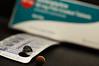

In [29]:
from IPython import display
url=getPhotoUrl(result,4,'t')
display.Image(url)

In [ ]:
def printPhotosUrl(pictures, size):
    

### Searching photos by Bounding Box

In [30]:
photos = flickr.photos.search(bbox="10.136009,43.920082,10.280204,43.980887")

In [31]:
printPhotosTitle(photos)

1-Moody sky in Cinquale di Montignoso (MS) - Tuscany - Italy
2-
3-Fishers with dog in the sunset
4-ponte del principe
5-Tramonto con pescatori al pontile di Forte dei Marmi in Versilia - Toscana - Italy
6-
7-
8-
9-
10-
11-
12-
13-
14-Uomo al tramonto sul pontile di Cinquale di Montignoso
15-Tramonto al pontile di Forte dei Marmi in Versilia - Febbraio 2021
16-Tramonto con qualche nuvola a Cinquale di Montignoso - Massa
17-Cinquale di Montignoso - Tramonto sul mare alla foce del fiume Versilia
18-Long exposure at Cinquale di Montignoso in Tuscany after the sunset
19-Monteggiori
20-La fotografa e il mare mosso al tramonto a Cinquale di Montignoso in Toscana
21-Tramonto a Cinquale di Montignoso, foce del fiume Versilia, nord della Toscana
22-Pescatore al tramonto a Cinquale di Montignoso in Toscana
23-Alpi Apuane viste dalla foce del fiume Versilia in Toscana
24-Man in the sunset under a grey sky at Cinquale di Montignoso in Tuscany
25-Pontile in long exposure a Cinquale di Montignoso in 

251

#### Print all pages of photos

In [33]:
num = 1

for page in range(1,photos['photos']['pages']+1):
    photos=flickr.photos.search(bbox="10.136009,43.920082,10.280204,43.980887", page=str(page))
    num = printPhotosTitle(photos)


1-Moody sky in Cinquale di Montignoso (MS) - Tuscany - Italy
2-
3-Fishers with dog in the sunset
4-ponte del principe
5-Tramonto con pescatori al pontile di Forte dei Marmi in Versilia - Toscana - Italy
6-
7-
8-
9-
10-
11-
12-
13-
14-Uomo al tramonto sul pontile di Cinquale di Montignoso
15-Tramonto al pontile di Forte dei Marmi in Versilia - Febbraio 2021
16-Tramonto con qualche nuvola a Cinquale di Montignoso - Massa
17-Cinquale di Montignoso - Tramonto sul mare alla foce del fiume Versilia
18-Long exposure at Cinquale di Montignoso in Tuscany after the sunset
19-Monteggiori
20-La fotografa e il mare mosso al tramonto a Cinquale di Montignoso in Toscana
21-Tramonto a Cinquale di Montignoso, foce del fiume Versilia, nord della Toscana
22-Spiaggia di Forte dei Marmi in Versilia con il pontile e cielo con nuvole
23-Pescatore al tramonto a Cinquale di Montignoso in Toscana
24-Tramonto al pontile di Cinquale di Montignoso (MS) - Foce del fiume Versilia
25-Alpi Apuane viste dalla foce del 

1-Long Exposure in a cloudy day
2-PIETRASANTA - Toscana
3-Valdes nella Chiesa di Sant'Agostino
4-Man looking at the sea
5-CONTROLUCE
6-Osservando il tramonto sul pontile di Forte dei Marmi in Versilia
7-La spiaggia di Forte dei Marmi nei pressi del pontile
8-Patino sul mare al tramonto
9-Pietrasanta
10-Pietrasanta
11-Pietrasanta
12-Pietrasanta
13-Pietrasanta
14-Pietrasanta
15-The bridge of Forte dei Marmi in the sunset
16-Cabine sulla spiaggia di Forte dei Marmi
17-Marina di Pietrasanta - Verso l'ora blu
18-Il mare
19-Pontile di Marina di Pietrasanta - Settembre 2018
20-Pietrasanta
21-Rescue boat on the beach
22-Pietrasanta
23-Pietrasanta
24-Pietrasanta
25-Pietrasanta
26-Pietrasanta
27-Pietrasanta
28-Pietrasanta
29-Pietrasanta
30-Pietrasanta
31-Pietrasanta
32-Pietrasanta
33-Pietrasanta
34-Pietrasanta
35-Pietrasanta
36-Beach in the sunset
37-Cabine in spiaggia
38-Piestrasanta Sky
39-Invasione di farfalle multicolori a Pietrasanta
40-On the beach
41-Forte dei Marmi: Il pontile
42-Ora blu

1-Pietrasanta umbrella
2-Umbrellas in Pietrasanta
3-night colorful sky
4-Rocca di Sala a Pietrasanta
5-Pietrasanta e gli ombrelli volanti
6-Pietrasanta
7-Pietrasanta
8-Pietrasanta
9-Pietrasanta
10-Pietrasanta
11-Sunset surfers
12-Via Francigena Mémoires 7/15
13-Via Francigena Memoires 6/15
14-N'uovo Sculpture
15-N'uovo Sculpture
16-Sea Versilia Surf #1
17-Brightness
18-Ferrari 250 GT coupé pf
19-250 GT Europa
20-860 Monza
21-Marina di Pietrasanta 6s01
22-Pietrasanta - Piazza del Duomo
23-Peperoncino 🌶 - #lauratintoriph
24-Pietrasanta - Piazza del Duomo
25-Marina di Pietrasanta Tonfano . #art #artist #artoftheday #artsy #beautiful #creative #draw #drawing #gallery #graphic #graphics #illustration #instaart #instaartist #instagood #masterpiece #paper #pen #pencil #photography #photooftheday #picture #sketch
26-Versilia _PANO_20170326_104230m1
27-I cavalli di Aceves al tramonto
28-
29-
30-
31-
32-BAGNO FRANCO MARE - MARINA DI PIETRASANTA
33-BAGNO FRANCO MARE - MARINA DI PIETRASANTA
34-BAG

1-
2-
3-Marina di Pietrasanta Tonfano . #art #artist #artoftheday #artsy #beautiful #creative #draw #drawing #gallery #graphic #graphics #illustration #instaart #instaartist #instagood #masterpiece #paper #pen #pencil #photography #photooftheday #picture #sketch
4-#art #artist #artoftheday #artsy #beautiful #creative #draw #drawing #gallery #graphic #graphics #illustration #instaart #instaartist #instagood #masterpiece #paper #pen #pencil #photography #photooftheday #picture #sketch #sketchbook #theoriginalgalaurch
5-#art #artist #artoftheday #artsy #beautiful #creative #draw #drawing #gallery #graphic #graphics #illustration #instaart #instaartist #instagood #masterpiece #paper #pen #pencil #photography #photooftheday #picture #sketch #sketchbook #theoriginalgalaurch
6-David and Goliath _MG_7266m1(9)
7-The perfect blue moment _MG_7543m1(3)
8-#art #artist #artoftheday #artsy #beautiful #creative #draw #drawing #gallery #graphic #graphics #illustration #instaart #instaartist #instagood 

1-Hasselblad Test Shot
2-Principe Forte dei Marmi Hotel-3737
3-Principe Forte dei Marmi Hotel-3739
4-Principe Forte dei Marmi Hotel-3740
5-Principe Forte dei Marmi Hotel-3741
6-Principe Forte dei Marmi Hotel-3742
7-Principe Forte dei Marmi Hotel-3743
8-Principe Forte dei Marmi Hotel-3744
9-Principe Forte dei Marmi Hotel-3747
10-Principe Forte dei Marmi Hotel-3749
11-Principe Forte dei Marmi Hotel-3750
12-Principe Forte dei Marmi Hotel-3751
13-Principe Forte dei Marmi Hotel-3753
14-Principe Forte dei Marmi Hotel-3755
15-Principe Forte dei Marmi Hotel-3756
16-Principe Forte dei Marmi Hotel-3757
17-Principe Forte dei Marmi Hotel-3758
18-Principe Forte dei Marmi Hotel-3760
19-Principe Forte dei Marmi Hotel-3762
20-Principe Forte dei Marmi Hotel-3765
21-Principe Forte dei Marmi Hotel-3769
22-Principe Forte dei Marmi Hotel-3770
23-Principe Forte dei Marmi Hotel-3771
24-Principe Forte dei Marmi Hotel-3778
25-Principe Forte dei Marmi Hotel-3779
26-Principe Forte dei Marmi Hotel-3781
27-Princip

1-Bird's Eye View
2-Km To Bite Into The...
3-Wherever I Go, I Carry 'Home...
4-Journey's End
5-The Immeasurable Value Of Friendship
6-Dogs Are Our Link To Paradise...
7-Perfect Balance
8-Theatre Of Books
9-What A Wonderful World!
10-Art En Plein Air
11-Medieval Atmosphere
12-Crepuscular Image
13-It's Dinner Time!
14-10th Century Timeline
15-Goodnight Moon
16-Senhor da Boa Fortuna
17-My #9ofpride
18-Anonymous by Miklòs Ligeti
19-Santuario Bom Jesus do Monte Braga
20-Daisy in Villa Barsanti
21-egitto #africa #igmasters #igdaily #ig #igers...
22-pietrasanta #versilia #italy #porta #arte #arts...
23-In Praise Of Plumpness.
24-"Lights Will Guide You Home..."
25-You'll Never Walk Alone
26-Wonderful Accidental Discovery
27-Death Leaves A Heartache No One...
28-Keep It In Mind!
29-Shipwreck! - From "Lapidarium. Phase One...
30-Artists' Glimpses - From "Lapidarium, Phase...
31-Half-Boat & Half-Horse Composition - From...
32-Far Away But Not Absent
33-Festive Atmosphere
34-Candies In Fair!
35-"C

1-tappi,
2-Pamela Grigiante "erotic dream" tecnica mista su carta @galleria33 #contemporaryart #pietrasanta #artexhibition #art #italianartist   #erotic #dream #mixedmedia #paper #colours #visualpoetry #gallery #show #collective #groupshow #exhibition #tuscany
3-@galleria33 @private_motel_of_art #insonnia #photography #fineart #art #contemporaryart #artexhibition #pietrasanta #gallery #italianartist #artist #artwork #bw #collective #show #groupshow #picture #pic #picoftheday #composition #photo #arte #artecontemp
4-@galleria33 #pietrasanta  #contemporaryart #art  #artexhibition #photography   #gallery #collective #show  #artevent #italianartists  #painting #photo #fineart  #picture #mixedmedia #pic   #arte #artecontemporanea #galleria #mostra #collettiva #evento #fo
5-@private_motel_of_art MALACHITE #photography #fineart #selfportrait   #exhibition @galleria33 #pietrasanta #contemporaryart #art #show #artexhibition #italianartist #gallery #groupshow #photo #mostra #arte #artecontempora

1-Pietrasanta
2-Beach & Alps
3-Pietrasanta
4-Pontile Forte dei Marmi
5-Légàmi
6-Carnevale Pietrasantino 2015
7-Carnevale Pietrasantino 2015
8-Tramonto in spiaggia
9-...fuori dal tunnel....
10-Forte dei Marmi - On the pier
11-Forte dei Marmi - On the pier
12-Pietrasanta
13-Pietrasanta
14-#analogic #olympus #om4 #film #ilford #fp4 #zuiko #16mm #fisheye #pietrasanta #art #sculpture #tuscany #italy
15-Sunset in Pietrasanta
16-Marina di Pietrasanta on Christmas Party
17-Pietrasanta
18-Pietrasanta
19-il mare d'inverno
20-Marble in Forte dei Marmi
21-Men in Motion, Italy 2014
22-Men in Motion, Italy 2014
23-Men in Motion, Italy 2014
24-Men in Motion, Italy 2014
25-Men in Motion, Italy 2014
26-Men in Motion, Italy 2014
27-Men in Motion, Italy 2014
28-Men in Motion, Italy 2014
29-Men in Motion, Italy 2014
30-Men in Motion, Italy 2014
31-Men in Motion, Italy 2014
32-Men in Motion, Italy 2014
33-Men in Motion, Italy 2014
34-Men in Motion, Italy 2014
35-Men in Motion, Italy 2014
36-Men in Motion, 

1-fdm
2-oahu
3-Airshow • Frecce Tricolori
4-Airshow • Frecce Tricolori
5-Sotto il sole di Forte dei Marmi
6-Airshow • Frecce Tricolori
7-Frecce Tricolori • Double exposure
8-Pietrasanta
9-BW_IMG_1803
10-Soya Burger And Bieta @ Casa
11-IMG_1669
12-Lenticchie Rosse Aglio Sedano E Salsa Al Peperoncino @ Casa
13-Men in Motion, Italy 2014
14-Men in Motion, Italy 2014
15-Men in Motion, Italy 2014
16-Men in Motion, Italy 2014
17-Men in Motion, Italy 2014
18-Men in Motion, Italy 2014
19-Arcimboldo, Mazzo di fiori
20-la bellezza non ha età
21-_DSC3004w
22-upload
23-IMG_6337
24-IMG_6363
25-IMG_6364
26-IMG_6366
27-IMG_6383
28-IMG_6384
29-IMG_6391
30-Daylight
31-4 shades of summer
32-Sky VS Sea
33-RED
34-Ego
35-The Photographer II
36-The Photographer
37-SCARS
38-upload
39-upload
40-upload
41-upload
42-upload
43-So sorry.
44-Vista da S.Anna di Stazzema
45-upload
46-Uscito il #sole! E si comporta come se ci fosse sempre stato!
47-#relax #paradise #summer #seaside #sea #holydays #forte #fortedeimarmi

1-
2-
3-
4-
5-
6-_DSC7070
7-_DSC7080
8-Pontile di Forte dei Marmi
9-Polaroid From Tonfano
10-#Italy
11-Sun-Day surfing
12-Alpi Apuane
13-The orange Fisherman.
14-Skate  Ph. @bluenailgirl
15-Yesterday's sunset
16-summertime sundness
17-Lords of Tonfano town
18-_DSC0004
19-_DSC0005
20-_DSC0014
21-_DSC0015
22-_DSC0016
23-_DSC0017
24-_DSC0018
25-_DSC0021
26-_DSC0023
27-_DSC0024
28-_DSC0025
29-_DSC0026
30-_DSC0031
31-_DSC0032
32-_DSC0035
33-_DSC0033
34-_DSC0037
35-_DSC0040
36-_DSC0041
37-_DSC0048
38-_DSC0049
39-_DSC0052
40-_DSC0055
41-_DSC0056
42-Panoramica_senza titolo1
43-Panoramica_senza titolo5
44-From the last Swell at home. @surf_culture
45-Vecchi tramonti. Il colore del cielo è lo stesso, ma questa foto la scattai alle 16:30 a gennaio, le giornate sono sempre più lunghe.
46-upload
47-upload
48-upload
49-Come prende bene la domenica con il sole
50-Sabato - Sole - Surf
51-Riflessi di notte
52-Surfing day at home - (ogni tanto le foto le fanno anche me)  Ph @romeo8636
53-upload
54-uploa

1-IMG_2602
2-Sculture
3-Trattore
4-Il forte
5-Art Is The Window To The Soul
6-Welcome Sweet Springtime!
7-Pietrasanta
8-Terzo premio concorso Abc Forte dei Marmi
9-Marzapanini @ Casa
10-Red Grapefruit Salad @ Casa
11-Mattoncini Difrutti Di Bosco E Cocco (No Eggs) @ Casa
12-Work in Progress
13-
14-Peonia bis
15-Peonia in giardino
16-Tortina Ai Frutti Di Bosco (Senza Uova) @ Casa
17-
18-Vertigo & Dizzy Heights
19-Nicegirl
20-Simply "He"
21-Simply "He"
22-Royal North
23-Versilia - Pietrasanta
24-Versilia - Pietrasanta
25-Cumquat Marmalad Fruits Salad @ Casa
26-La Cava Del Falco
27-Svincoli - Albero - Tree
28-il mare prima della primavera
29-il mare prima della primavera
30-il mare prima della primavera
31-Versilia
32-Versilia
33-Versilia
34-Versilia
35-Versilia
36-Versilia
37-upload
38-EasterRainbow
39-Si va, si viene
40-The line...
41-Dentro ad un quadro
42-Daniele in action (alias Rasalhague)
43-Amore cieco
44-Dramma in autogrill.
45-Photo HDR 2
46-Photo HDR 3
47-Photo HDR 1
48-Salvia o

1-Moody sky in Cinquale di Montignoso (MS) - Tuscany - Italy
2-
3-Fishers with dog in the sunset
4-ponte del principe
5-Tramonto con pescatori al pontile di Forte dei Marmi in Versilia - Toscana - Italy
6-
7-
8-
9-
10-
11-
12-
13-
14-Uomo al tramonto sul pontile di Cinquale di Montignoso
15-Tramonto al pontile di Forte dei Marmi in Versilia - Febbraio 2021
16-Tramonto con qualche nuvola a Cinquale di Montignoso - Massa
17-Cinquale di Montignoso - Tramonto sul mare alla foce del fiume Versilia
18-Long exposure at Cinquale di Montignoso in Tuscany after the sunset
19-Monteggiori
20-La fotografa e il mare mosso al tramonto a Cinquale di Montignoso in Toscana
21-Tramonto a Cinquale di Montignoso, foce del fiume Versilia, nord della Toscana
22-Spiaggia di Forte dei Marmi in Versilia con il pontile e cielo con nuvole
23-Pescatore al tramonto a Cinquale di Montignoso in Toscana
24-Tramonto al pontile di Cinquale di Montignoso (MS) - Foce del fiume Versilia
25-Alpi Apuane viste dalla foce del 

1-Moody sky in Cinquale di Montignoso (MS) - Tuscany - Italy
2-
3-Fishers with dog in the sunset
4-ponte del principe
5-Tramonto con pescatori al pontile di Forte dei Marmi in Versilia - Toscana - Italy
6-
7-
8-
9-
10-
11-
12-
13-
14-Uomo al tramonto sul pontile di Cinquale di Montignoso
15-Tramonto al pontile di Forte dei Marmi in Versilia - Febbraio 2021
16-Tramonto con qualche nuvola a Cinquale di Montignoso - Massa
17-Cinquale di Montignoso - Tramonto sul mare alla foce del fiume Versilia
18-Long exposure at Cinquale di Montignoso in Tuscany after the sunset
19-Monteggiori
20-La fotografa e il mare mosso al tramonto a Cinquale di Montignoso in Toscana
21-Tramonto a Cinquale di Montignoso, foce del fiume Versilia, nord della Toscana
22-Spiaggia di Forte dei Marmi in Versilia con il pontile e cielo con nuvole
23-Pescatore al tramonto a Cinquale di Montignoso in Toscana
24-Tramonto al pontile di Cinquale di Montignoso (MS) - Foce del fiume Versilia
25-Alpi Apuane viste dalla foce del 

1-Moody sky in Cinquale di Montignoso (MS) - Tuscany - Italy
2-
3-Fishers with dog in the sunset
4-ponte del principe
5-Tramonto con pescatori al pontile di Forte dei Marmi in Versilia - Toscana - Italy
6-
7-
8-
9-
10-
11-
12-
13-
14-Uomo al tramonto sul pontile di Cinquale di Montignoso
15-Tramonto al pontile di Forte dei Marmi in Versilia - Febbraio 2021
16-Tramonto con qualche nuvola a Cinquale di Montignoso - Massa
17-Cinquale di Montignoso - Tramonto sul mare alla foce del fiume Versilia
18-Long exposure at Cinquale di Montignoso in Tuscany after the sunset
19-Monteggiori
20-La fotografa e il mare mosso al tramonto a Cinquale di Montignoso in Toscana
21-Tramonto a Cinquale di Montignoso, foce del fiume Versilia, nord della Toscana
22-Spiaggia di Forte dei Marmi in Versilia con il pontile e cielo con nuvole
23-Pescatore al tramonto a Cinquale di Montignoso in Toscana
24-Tramonto al pontile di Cinquale di Montignoso (MS) - Foce del fiume Versilia
25-Alpi Apuane viste dalla foce del 

#### Combining criteria

In [34]:
photos = flickr.photos.search(bbox="10.136009,43.920082,10.280204,43.980887", tags="church")
printPhotosTitle(photos)

1-Arte a Pietrasanta - Mostra in piazza di Fabio Viale
2-Querceta vista da Piazza Pertini
3-Duomo di Pietrasanta in Versilia
4-Lillie
5-Pietrasanta città d'arte
6-Scorcio di Pietrasanta
7-DSC_9833 Toscana - Pietrasanta
8-Pietrasanta
9-2015-08 Iconography Excursion IMG_5796
10-2015-08 Iconography Excursion IMG_5797
11-2015-08 Iconography Excursion IMG_5798
12-2015-08 Iconography Excursion IMG_5803
13-2015-08 Iconography Excursion IMG_5805
14-2015-08 Iconography Excursion IMG_5806
15-2015-08 Iconography Excursion IMG_5813
16-2015-08 Iconography Excursion IMG_5814
17-2011-08 Iconography Excursion DSC_0004
18-2011-08 Iconography Excursion DSC_0002
19-2011-08 Iconography Excursion DSC_0006
20-2011-08 Iconography Excursion DSC_0012
21-2011-08 Iconography Excursion DSC_0026
22-2011-08 Iconography Excursion DSC_0037
23-2011-08 Iconography Excursion DSC_0072
24-2011-08 Iconography Excursion DSC_0092
25-2011-08 Iconography Excursion DSC_0102
26-2011-08 Iconography Excursion DSC_0106
27-2011-08 I

73

In [36]:
print(photos['photos']['photo'][1])

Pretty printing has been turned OFF


### Get Photo Info

In [74]:
#info = flickr.photos.getInfo(photo_id=46941982961)
info = flickr.photos.getInfo(photo_id=46490694771)
pprint(info)

{'photo': {'comments': {'_content': '0'},
           'dates': {'lastupdate': '1559235851',
                     'posted': '1545943621',
                     'taken': '2018-12-27 18:45:07',
                     'takengranularity': '0',
                     'takenunknown': '0'},
           'dateuploaded': '1545943621',
           'description': {'_content': 'Duomo di Pietrasanta in Versilia'},
           'editability': {'canaddmeta': 0, 'cancomment': 0},
           'farm': 5,
           'geoperms': {'iscontact': 0,
                        'isfamily': 0,
                        'isfriend': 0,
                        'ispublic': 1},
           'id': '46490694771',
           'isfavorite': 0,
           'license': '3',
           'location': {'accuracy': '16',
                        'context': '0',
                        'country': {'_content': 'Italia', 'woeid': 23424853},
                        'county': {'_content': 'Lucca', 'woeid': 12591888},
                        'latitude': '43.

In [75]:
location = flickr.photos.geo.getLocation(photo_id=46490694771)
pprint(location)

{'photo': {'id': '46490694771',
           'location': {'accuracy': '16',
                        'context': '0',
                        'country': {'_content': 'Italia', 'woeid': 23424853},
                        'county': {'_content': 'Lucca', 'woeid': 12591888},
                        'latitude': '43.957437',
                        'locality': {'_content': 'Pietrasanta',
                                     'woeid': 720515},
                        'longitude': '10.231930',
                        'neighbourhood': {'_content': '', 'woeid': 0},
                        'region': {'_content': 'Toscana', 'woeid': 7153345}}},
 'stat': 'ok'}


### Photo Comments

In [47]:
comments=flickr.photos.comments.getList(photo_id=47293233532)
print(len(comments['comments']['comment']))
pprint(comments)

212
{'comments': {'comment': [{'_content': '<b>AMAZING capture! \n'
                                       'You deserved this award! \n'
                                       'Seen in:</b> \n'
                                       '\n'
                                       '<a '
                                       'href="https://www.flickr.com/groups/1431012@N23/"><img '
                                       'src="https://farm4.static.flickr.com/3228/3143749548_34398e6175_m.jpg" '
                                       'width="240" height="187" alt="The '
                                       'GALAXY award" /></a>\n'
                                       '<a '
                                       'href="https://www.flickr.com/groups/1431012@N23// '
                                       '"> \n'
                                       '<u>The GALAXY Award</u> (Post 1~Award '
                                       '5) \n'
                                       'Sweeper is Activ

                           'realname': 'Didier Massé'},
                          {'_content': '<b>AMAZING capture! \n'
                                       'You deserved this award! \n'
                                       'Seen in:</b> \n'
                                       '\n'
                                       '<a '
                                       'href="https://www.flickr.com/groups/1431012@N23/"><img '
                                       'src="https://farm4.static.flickr.com/3228/3143749548_34398e6175_m.jpg" '
                                       'width="240" height="187" alt="The '
                                       'GALAXY award" /></a>\n'
                                       '<a '
                                       'href="https://www.flickr.com/groups/1431012@N23// '
                                       '"> \n'
                                       '<u>The GALAXY Award</u> (Post 1~Award '
                                       '5) \n'
    

                           'realname': 'Maximo Manzanares'},
                          {'_content': 'Seen and appreciated in Photography '
                                       'for Recreation - Level 3 for Gold '
                                       'Award\n'
                                       '<a '
                                       'href="http://www.flickr.com/groups/1482249@N23/">www.flickr.com/groups/1482249@N23/</a>\n'
                                       '<a '
                                       'href="https://www.flickr.com/groups/1482249@N23/"><img '
                                       'src="https://farm5.static.flickr.com/4142/4884314520_bed818d21e_o.jpg" '
                                       '/></a>\n'
                                       '\n'
                                       '<a '
                                       'href="https://www.flickr.com/groups/pfr_emerald/"><img '
                                       'src="https://farm5.static.fli

### Printing pretty comments

In [48]:
import datetime

def getTime(epoch):
    return(datetime.datetime.fromtimestamp(epoch).strftime('%c'))
    
for comment in comments['comments']['comment']:
    print('***************************************')
    print('***************************************')
    print('***************************************')
    print(getTime(int(comment['datecreate'])))
    print(comment['authorname'])
    print(comment['_content'])


***************************************
***************************************
***************************************
Mon Mar 11 08:05:42 2019
MIMAMOR
<b>AMAZING capture! 
You deserved this award! 
Seen in:</b> 

<a href="https://www.flickr.com/groups/1431012@N23/"><img src="https://farm4.static.flickr.com/3228/3143749548_34398e6175_m.jpg" width="240" height="187" alt="The GALAXY award" /></a>
<a href="https://www.flickr.com/groups/1431012@N23// "> 
<u>The GALAXY Award</u> (Post 1~Award 5) 
Sweeper is Active! 
THANK YOU for sharing this WONDERFUL photo!</a> 
NEW - <b>If you have 10 Galaxy Awards, 
request the 10+ Admin Award </b> <a href="https://www.flickr.com/groups/4014924@N23/">in The Galaxy 10+ Award Group</a>
***************************************
***************************************
***************************************
Mon Mar 11 08:06:17 2019
Knut-Arve Simonsen
<b>AMAZING capture! 
You deserved this award! 
Seen in:</b> 

<a href="https://www.flickr.com/groups/1431012@

In [ ]:
for comment in comments['comments']['comment']:
    print(getTime(int(comment['datecreate'])))
    print(comment['authorname'])
    print(comment['_content'])


### Places

In [49]:
placeTypes = flickr.places.getPlaceTypes()
pprint(placeTypes)

{'place_types': {'place_type': [{'_content': 'neighbourhood', 'id': 22},
                                {'_content': 'locality', 'id': 7},
                                {'_content': 'county', 'id': 9},
                                {'_content': 'region', 'id': 8},
                                {'_content': 'country', 'id': 12},
                                {'_content': 'continent', 'id': 29}]},
 'stat': 'ok'}


In [50]:
places = flickr.places.placesForBoundingBox(bbox="10.136009,43.920082,10.280204,43.980887",place_type_id=9)
# minimum_longitude, minimum_latitude, maximum_longitude, maximum_latitude
# top right 43.980887, 10.136009
# bottom left 43.920082, 10.280204
pprint(places)

{'places': {'bbox': '10.136009,43.920082,10.280204,43.980887',
            'page': 1,
            'pages': 1,
            'place': [],
            'place_type': 'county',
            'total': 0},
 'stat': 'ok'}


In [51]:
places=flickr.places.find(query="Pietrasanta")
pprint(places)

{'places': {'place': [], 'query': 'Pietrasanta', 'total': 0}, 'stat': 'ok'}


### Get photos from user

In [52]:
photos = flickr.photos.search(user_id='139326041@N04', per_page='200')

In [53]:
from pprint import pprint # pretty print json

pprint(photos)

{'photos': {'page': 1,
            'pages': 3,
            'perpage': 200,
            'photo': [{'farm': 66,
                       'id': '51039242851',
                       'isfamily': 0,
                       'isfriend': 0,
                       'ispublic': 1,
                       'owner': '139326041@N04',
                       'secret': 'f67b1ee4c0',
                       'server': '65535',
                       'title': 'Batiment de forces motrice'},
                      {'farm': 66,
                       'id': '51018959862',
                       'isfamily': 0,
                       'isfriend': 0,
                       'ispublic': 1,
                       'owner': '139326041@N04',
                       'secret': '277b170f8f',
                       'server': '65535',
                       'title': 'La bellezza della curiosità'},
                      {'farm': 66,
                       'id': '50969314537',
                       'isfamily': 0,
                   

                       'secret': '7025cb5e46',
                       'server': '940',
                       'title': 'love selfies'},
                      {'farm': 1,
                       'id': '43644100682',
                       'isfamily': 0,
                       'isfriend': 0,
                       'ispublic': 1,
                       'owner': '139326041@N04',
                       'secret': '11330bdb91',
                       'server': '849',
                       'title': 'Ceramica nella Reggia di Colorno'},
                      {'farm': 1,
                       'id': '42955130534',
                       'isfamily': 0,
                       'isfriend': 0,
                       'ispublic': 1,
                       'owner': '139326041@N04',
                       'secret': '823f8060a1',
                       'server': '927',
                       'title': '...e nel cielo la scia di un aereo (Isola '
                                'Palmaria, Tino e Tinetto'},
 

In [ ]:
def printPhotosUrl(photos):
    num = 1
    for photo in photos:
        print(str(num) + '-' + photo['title'])
        num +=1
        #https://farm{farm-id}.staticflickr.com/{server-id}/{id}_{secret}.jpg
        #https://farm8.staticflickr.com/7922/33472792818_0fae089902.jpg
        print('https://farm' + str(photo['farm']) + '.staticflickr.com/' + photo['server'] + '/' + photo['id'] + '_' + photo['secret'] + '.jpg')

In [82]:
printPhotosUrl(photos['photos']['photo'],1)

1-Il Castello di Rivalta illuminato
https://farm66.staticflickr.com/65535/49687220797_f7f3dfc348_b.jpg
2-Onde a San Terenzo
https://farm66.staticflickr.com/65535/49663030397_3ae26f2c76_b.jpg
3-Carnevale Pietrasantino
https://farm66.staticflickr.com/65535/49609707802_dc43e459cc_b.jpg
4-Carnevale Pietrasantino. Maschera steampunk
https://farm66.staticflickr.com/65535/49586893338_c3af40402b_b.jpg
5-Ormeggi nel Golfo
https://farm66.staticflickr.com/65535/49558768671_00e435c97c_b.jpg
6-Tra_Moncigoli_e_Soliera
https://farm66.staticflickr.com/65535/49505305712_70be1f12c2_b.jpg
7-Ultimo raggio di sole sul Ponte San Francesco
https://farm66.staticflickr.com/65535/49459094242_51e6631637_b.jpg
8-Firenze la riva sinistra
https://farm66.staticflickr.com/65535/49421542741_04098e24c6_b.jpg
9-Palla di Natale in Piazza Santa Trinità
https://farm66.staticflickr.com/65535/49244206062_e2e653c8c7_b.jpg
10-Carrozze e Fiaccherai a Firenze
https://farm66.staticflickr.com/65535/49222612441_8ef3c16a84_b.jpg
11-

201

### Get Photoset of a user

In [ ]:
photosets = flickr.photosets.getList(user_id='25700667@N03')

In [ ]:
pprint (photosets)

In [ ]:
photos=flickr.photosets.getPhotos(photoset_id='72157701514793472', user_id='25700667@N03')
pprint(photos)

In [ ]:
printPhotosUrl(photos['photoset']['photo'])